In [1]:
from pylab import *
import nylib, nylib2, cjlib, cxlib
import pandas as pd
import mouseProcessing
import B0Correction
import numpy
import cv2
%matplotlib inline

In [2]:
dataPath = '/Volumes/CX/JHU/Machine_Learning_BreastTumor/data/20200827_203749_double_tumors_mouse_1_5'
field500 = float(nylib.BrukerPar('%s/14'%dataPath, 'acqp','SFO1') )

In [3]:
import datetime
import time
expNumbers = range(0, 30)
expMethod = [None for ii in range(len(expNumbers))]
expRunTime = [None for ii in range(len(expNumbers))]
Comments = [None for ii in range(len(expNumbers))]

for ii, ei in enumerate(expNumbers):
    try:
        expMethod[ii] = nylib.BrukerPar('%s/%s'%(dataPath, ei), 'method', 'Method=')[:-1]        
        timeTemp = str((nylib.searchFile('%s/%s/acqp'%(dataPath, ei), '2020')).split()[1:3])
        timeTemp2 = time.strptime(timeTemp,"['%Y-%m-%d', '%H:%M:%S.%f']")
        timeTemp3 = datetime.datetime.fromtimestamp(time.mktime(timeTemp2))
        expRunTime[ii] = timeTemp3.strftime('%H:%M:%S')
        Comments[ii] = nylib.searchFileNext('%s/%s/pdata/1/visu_pars'%(dataPath, ei), 'VisuSeriesComment=')
            
    except:
        pass
expTable = zip(expNumbers, expMethod, expRunTime, Comments)
df = pd.DataFrame(data = expTable, columns=['ExperimentNumber', 'Method', 'expRunTime','Comment'])
# df = df[df.Method.notnull()]

df['expRunTime'] = (pd.to_datetime(df['expRunTime']))
df['expRunTime'] = df['expRunTime'].dt.time
df.sort_values(by=['expRunTime'])
# print(df.to_string())

,ExperimentNumber,Method,expRunTime,Comment
1,1,<Bruker:FLASH>,20:41:11,None
2,2,<Bruker:RARE>,20:48:50,None
3,3,<Bruker:FLASH>,20:54:52,None
5,5,<Bruker:RARE>,20:58:28,None
7,7,<Bruker:FieldMap>,21:03:50,None
6,6,<Bruker:STEAM>,21:07:11,None
8,8,<User:cestRAREst>,21:23:34,<cestRAREst_DS_0.3uT_4s_10s>
9,9,<User:cestRAREst>,21:37:29,<cestRAREst_DS_0.5uT_4s_10s>
12,12,<User:cestRAREst>,21:51:23,<cestRAREst_DS_1.0uT_4s_10s>
13,13,<User:cestRAREst>,22:05:17,<cestRAREst_DS_2.0uT_4s_10s>


In [4]:
## define parameters
save_dir = '/Volumes/CX/JHU/Machine_Learning_BreastTumor/results/20210104/old_mice/M4/'

# wassrNum = 14
# cestNum = r_[14, 15, 16]

wassrNum = 9
cestNum = r_[9, 12, 13]

pulsePowers = r_[0.5, 1.0, 2.0]
T2Num = 5
T2Slice = 13
roiNum = 7
mouse = 'M4'

# T2

In [5]:
save_dir = '/Volumes/CX/JHU/Machine_Learning_BreastTumor/results/20210104/old_mice/M4/'
mouse = 'M4'

# T2
data_T2 = nylib.Paravision2dseqNew('%s/%d'%(dataPath, T2Num))
t2Slice = data_T2[T2Slice]
from scipy.io import savemat
savemat(save_dir + "T2.mat", {'T2':t2Slice})



(1, 21, 1, 256, 256)


In [6]:
# save_dir = '/Volumes/CX/JHU/Machine_Learning_BreastTumor/results/20210104/old_mice/M4/'
# mouse = 'M4'

# from scipy.io import loadmat
# T2 = loadmat(save_dir + "T2.mat")
# t2Slice = T2['T2']


(-0.5, 255.5, 255.5, -0.5)

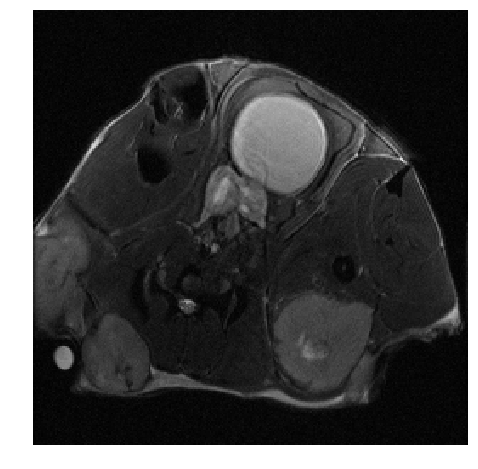

In [7]:
figure(figsize=(8,8))
imshow(t2Slice)
gray()
plt.axis('off')

# WASSR

(82, 1, 1, 64, 64)


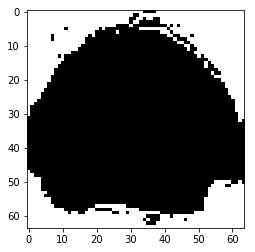

In [8]:
data_temp = nylib.Paravision2dseqNew('%s/%d'%(dataPath, cestNum[0]))
# cjlib.mmontage(data_temp0)
# choose noise
imshow(data_temp[-1]<15)

(82, 1, 1, 64, 64)


/Users/cbie1/opt/anaconda2/envs/python2/lib/python2.7/site-packages/scipy/optimize/minpack.py:447: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


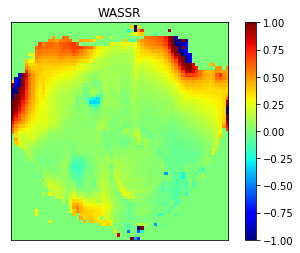

In [9]:
# use 0.3uT as WASSR
reload(B0Correction)
wassrMap,  delta_freq_map= B0Correction.wassrProcessing(dataPath, wassrNum, data_temp[-1]>15)

# cjlib.mimage(wassrMap)
imshow(delta_freq_map/500,origin='lower')
axis('image') # needed so that ginput doesn't resize the image
clim([ percentile(delta_freq_map/500,1) , percentile(delta_freq_map/500, 99) ])
xticks([])
yticks([])
title('WASSR')
    
colorbar()
jet()
clim(-1,1)

# filter noise

In [10]:
#normalization and B0 correction 
reload(mouseProcessing)
reload(B0Correction)
cestData, cestFreq = mouseProcessing.loadMultiData(dataPath, cestNum)

cestDatanoCorrected = zeros((cestData.shape[0], cestData.shape[1]-1, cestData.shape[2], cestData.shape[3]))
cestDatanoCorrected = mouseProcessing.normalizeData(dataPath, cestNum, cestFreq, cestData, data_temp[-1]>20)

cestFreq = cestFreq[:-1]
cestDataCorrected = zeros((cestData.shape[0], cestData.shape[1]-1, cestData.shape[2], cestData.shape[3]))
cestDataCorrected = B0Correction.B0correct(dataPath, cestNum, cestDatanoCorrected, data_temp[-1]>20, delta_freq_map, cestFreq)

print cestFreq

(82, 1, 1, 64, 64)
(82, 1, 1, 64, 64)
(82, 1, 1, 64, 64)
(82, 1, 1, 64, 64)
[-6.   -5.85 -5.7  -5.55 -5.4  -5.25 -5.1  -4.95 -4.8  -4.65 -4.5  -4.35
 -4.2  -4.05 -3.9  -3.75 -3.6  -3.45 -3.3  -3.15 -3.   -2.85 -2.7  -2.55
 -2.4  -2.25 -2.1  -1.95 -1.8  -1.65 -1.5  -1.35 -1.2  -1.05 -0.9  -0.75
 -0.6  -0.45 -0.3  -0.15  0.    0.15  0.3   0.45  0.6   0.75  0.9   1.05
  1.2   1.35  1.5   1.65  1.8   1.95  2.1   2.25  2.4   2.55  2.7   2.85
  3.    3.15  3.3   3.45  3.6   3.75  3.9   4.05  4.2   4.35  4.5   4.65
  4.8   4.95  5.1   5.25  5.4   5.55  5.7   5.85  6.  ]


In [11]:
from scipy.io import savemat
savemat(save_dir + "cestData.mat", {'cestData':cestData})
savemat(save_dir + "cestDataCorrected.mat", {'cestDataCorrected':cestDataCorrected})
savemat(save_dir + "cestFreq.mat", {'cestFreq':cestFreq})



In [12]:
# import scipy.io
# cestData = scipy.io.loadmat(save_dir +  'cestData.mat')
# cestData = cestData['cestData']

# cestDataCorrected = scipy.io.loadmat(save_dir +  'cestDataCorrected.mat')
# cestDataCorrected = cestDataCorrected['cestDataCorrected']

# cestFreq = scipy.io.loadmat(save_dir +  'cestFreq.mat')
# cestFreq = squeeze(cestFreq['cestFreq'])

In [13]:
reload(cxlib)

cestDataCorrectedFilter = cxlib.image_filter(cestDataCorrected,3)

# Z-spectra analysis

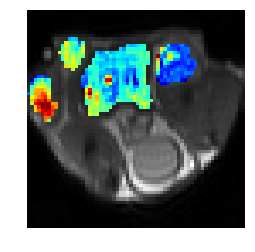

In [15]:
# choose whole tumor
MDA_MB_231_whole = [(47.033333333333324, 52.36666666666667), (46.3, 53.233333333333334), (44.699999999999996, 53.63333333333333), (43.49999999999999, 53.96666666666667), (41.56666666666666, 53.36666666666667), (39.76666666666666, 52.166666666666664), (38.83333333333333, 50.833333333333336), (38.36666666666666, 48.766666666666666), (38.03333333333333, 46.43333333333333), (38.099999999999994, 44.833333333333336), (38.633333333333326, 43.56666666666666), (39.699999999999996, 42.766666666666666), (41.96666666666666, 42.766666666666666), (43.96666666666666, 43.3), (46.166666666666664, 43.9), (47.83333333333333, 44.36666666666667), (48.89999999999999, 45.766666666666666), (49.23333333333333, 47.166666666666664), (49.23333333333333, 48.5), (48.49999999999999, 49.9), (47.76666666666666, 51.166666666666664)]
# [(44.23333333333333, 54.36666666666667), (43.166666666666664, 54.5), (41.43333333333333, 53.56666666666666), (40.49999999999999, 52.36666666666667), (39.3, 50.5), (38.633333333333326, 48.63333333333333), (38.3, 46.56666666666666), (38.36666666666666, 44.56666666666666), (38.43333333333333, 43.233333333333334), (39.36666666666666, 42.9), (41.43333333333333, 43.1), (43.56666666666666, 43.3), (45.23333333333333, 43.833333333333336), (47.23333333333333, 43.9), (49.033333333333324, 45.1), (48.56666666666666, 47.56666666666666), (48.166666666666664, 50.03333333333333), (47.36666666666666, 52.03333333333333), (45.83333333333333, 54.166666666666664), (44.83333333333333, 54.766666666666666)]
MCF_7_whole_1 = [(4.299999999999997, 44.5), (2.9666666666666632, 44.3), (1.2999999999999972, 43.43333333333333), (1.0333333333333297, 41.9), (0.8999999999999968, 39.7), (1.0333333333333297, 37.5), (1.43333333333333, 36.03333333333333), (2.8333333333333304, 34.63333333333333), (4.099999999999996, 33.03333333333333), (5.766666666666664, 31.3), (6.966666666666663, 31.766666666666666), (7.899999999999997, 33.56666666666666), (8.433333333333332, 35.766666666666666), (8.03333333333333, 36.96666666666667), (6.83333333333333, 37.96666666666667), (6.566666666666665, 39.766666666666666), (6.6999999999999975, 41.56666666666666), (6.366666666666662, 43.36666666666667), (5.566666666666665, 44.1), (5.03333333333333, 44.43333333333333)]
MCF_7_whole_2 = [(15.099999999999996, 54.833333333333336), (14.166666666666663, 55.63333333333333), (11.699999999999998, 55.166666666666664), (9.099999999999996, 53.833333333333336), (8.566666666666665, 51.766666666666666), (9.433333333333332, 49.833333333333336), (10.499999999999998, 47.766666666666666), (12.099999999999996, 46.3), (13.899999999999997, 46.7), (15.366666666666662, 48.233333333333334), (16.566666666666663, 50.03333333333333), (16.9, 52.5), (16.36666666666666, 54.03333333333333)]
Muscle_whole = [(26.499999999999993, 52.1), (25.03333333333333, 51.96666666666667), (22.83333333333333, 51.63333333333333), (19.96666666666666, 51.766666666666666), (18.166666666666664, 48.833333333333336), (16.83333333333333, 46.9), (15.566666666666665, 44.96666666666667), (15.566666666666665, 42.3), (16.233333333333327, 36.9), (17.299999999999997, 32.63333333333333), (20.633333333333333, 32.36666666666667), (23.96666666666666, 33.96666666666667), (26.633333333333326, 36.5), (30.233333333333327, 36.43333333333333), (32.89999999999999, 34.766666666666666), (35.49999999999999, 34.9), (36.03333333333333, 36.166666666666664), (35.099999999999994, 39.56666666666666), (34.96666666666666, 44.43333333333333), (35.3, 48.03333333333333), (35.699999999999996, 51.833333333333336), (34.36666666666666, 53.56666666666666), (32.099999999999994, 53.56666666666666), (29.499999999999993, 53.56666666666666), (28.233333333333327, 53.56666666666666)]

# MDA_MB_231_whole = [(x[0]+1, x[1]-0) for x in MDA_MB_231_whole]
# MCF_7_whole_1 = [(x[0]+1, x[1]-0) for x in MCF_7_whole_1]
# MCF_7_whole_2 = [(x[0]+1, x[1]+0) for x in MCF_7_whole_2]

# get the mask and erosion
MDA_mask_whole = nylib2.roipolyny(cestDataCorrected[0], MDA_MB_231_whole)
MCF_mask_whole_1 = nylib2.roipolyny(cestDataCorrected[0], MCF_7_whole_1)
MCF_mask_whole_2 = nylib2.roipolyny(cestDataCorrected[0], MCF_7_whole_2)
muscle_mask_mask = nylib2.roipolyny(cestDataCorrected[0], Muscle_whole)

kernel = np.ones((2,2),np.uint8)
muscle_mask_mask = cv2.erode(muscle_mask_mask,kernel,iterations = 1)


# kernel = np.ones((2,1),np.uint8)
# MDA_mask_whole = cv2.erode(MDA_mask_whole,kernel,iterations = 1)

kernel = np.ones((1,2),np.uint8)
MCF_mask_whole_2 = cv2.erode(MCF_mask_whole_2,kernel,iterations = 1)

MCF_mask_whole = np.ma.mask_or(MCF_mask_whole_1, MCF_mask_whole_2)


imshow(cestData[-1,-1],origin='lower')
gray()

maskedRoi = ma.masked_array(cestData[-1,-1], mask=(MDA_mask_whole==0))
imshow(maskedRoi,origin='lower')
jet()

maskedRoi = ma.masked_array(cestData[-1,-1], mask=(MCF_mask_whole==0))
imshow(maskedRoi,origin='lower')
jet()


maskedRoi = ma.masked_array(cestData[-1,-1], mask=(muscle_mask_mask==0))
imshow(maskedRoi,origin='lower')
jet()

axis("off")

mask_MDA_MB_231 = MDA_mask_whole
mask_MCF_7 = MCF_mask_whole
mask_muscle_back = muscle_mask_mask

In [17]:
# Z-spectra
pulsePowers = r_[0.5, 1.0, 2.0]

data_pulsePowerDependence_masked = zeros((cestDataCorrectedFilter.shape[0], 3, cestDataCorrectedFilter.shape[1]))

for ii in range(len(pulsePowers)):    
    data_pulsePowerDependence_masked[ii, 0] = nylib2.applyMask(cestDataCorrected[ii], mask_MDA_MB_231)   
    data_pulsePowerDependence_masked[ii, 1] = nylib2.applyMask(cestDataCorrected[ii], mask_MCF_7)
    data_pulsePowerDependence_masked[ii, 2] = nylib2.applyMask(cestDataCorrected[ii], mask_muscle_back)   

# compare different ROIs

/Users/cbie1/opt/anaconda2/envs/python2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'S/S$_0$')

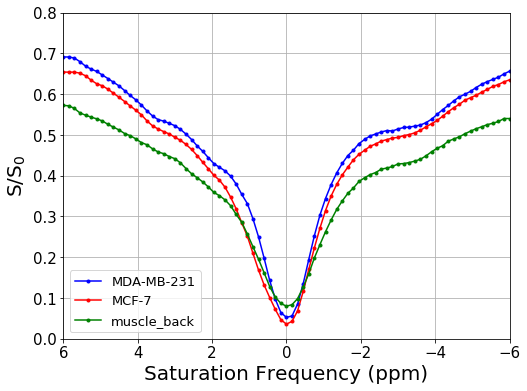

In [18]:
# plot Z-spectra
figure(figsize=(8,6))

# duration time: 1s
# power: 0.3uT, 0.5uT, 1.0uT, 2.0uT, 0.5uT, 1.0uT, 2.0uT
# tag: 0, 1, 2, 3, 4, 5, 6
tag = 2

plot(cestFreq, data_pulsePowerDependence_masked[tag+0,0], 'b.-', label='MDA-MB-231')
plot(cestFreq, data_pulsePowerDependence_masked[tag+0,1], 'r.-', label='MCF-7')
plot(cestFreq, data_pulsePowerDependence_masked[tag+0,2], 'g.-', label='muscle_back')


grid('on')
ylim(0, .8)
xlim(6,-6)
legend(loc='lower left',fontsize=13)
tick_params(labelsize=15)
xlabel('Saturation Frequency (ppm)',fontsize=20)
ylabel('S/S$_0$',fontsize=20)

Text(0,0.5,'S/S$_0$')

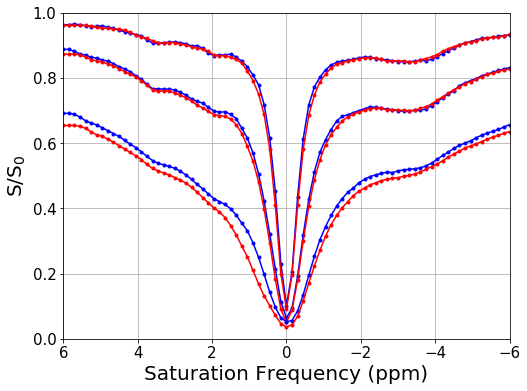

In [19]:
# plot Z-spectra
figure(figsize=(8,6))

# duration time: 1s
# power: 0.3uT, 0.5uT, 1.0uT, 2.0uT, 0.5uT, 1.0uT, 2.0uT
# tag: 0, 1, 2, 3, 4, 5, 6
tag = 3

plot(cestFreq, data_pulsePowerDependence_masked[0,0], 'b.-', label='MDA-MB-231')
plot(cestFreq, data_pulsePowerDependence_masked[0,1], 'r.-', label='MCF-7')

plot(cestFreq, data_pulsePowerDependence_masked[1,0], 'b.-', label='MDA-MB-231')
plot(cestFreq, data_pulsePowerDependence_masked[1,1], 'r.-', label='MCF-7')

plot(cestFreq, data_pulsePowerDependence_masked[2,0], 'b.-', label='MDA-MB-231')
plot(cestFreq, data_pulsePowerDependence_masked[2,1], 'r.-', label='MCF-7')

grid('on')
ylim(0, 1)
xlim(6,-6)
# legend(loc='lower left',fontsize=13)
tick_params(labelsize=15)
xlabel('Saturation Frequency (ppm)',fontsize=20)
ylabel('S/S$_0$',fontsize=20)

In [20]:
# # save 1s data
# Ztab_MDA_MB_231 = zeros((3, len(cestFreq)))
# Ztab_MDA_MB_231[0] = data_pulsePowerDependence_masked[0,0]
# Ztab_MDA_MB_231[1] = data_pulsePowerDependence_masked[1,0]
# Ztab_MDA_MB_231[2] = data_pulsePowerDependence_masked[2,0]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_Ztab_MDA_MB_231.mat", {'Ztab_MDA_MB_231':Ztab_MDA_MB_231})

# Ztab_MCF_7 = zeros((3, len(cestFreq)))
# Ztab_MCF_7[0] = data_pulsePowerDependence_masked[0,1]
# Ztab_MCF_7[1] = data_pulsePowerDependence_masked[1,1]
# Ztab_MCF_7[2] = data_pulsePowerDependence_masked[2,1]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_Ztab_MCF_7.mat", {'Ztab_MCF_7':Ztab_MCF_7})

# Ztab_Muscle_back = zeros((3, len(cestFreq)))
# Ztab_Muscle_back[0] = data_pulsePowerDependence_masked[0,2]
# Ztab_Muscle_back[1] = data_pulsePowerDependence_masked[1,2]
# Ztab_Muscle_back[2] = data_pulsePowerDependence_masked[2,2]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_Ztab_Muscle_back.mat", {'Ztab_Muscle':Ztab_Muscle_back})


In [21]:
# select frequency
inds_sat = np.nonzero( cestFreq < (cestFreq.max()+1) )[0] 
fitinds = np.hstack((np.where( (cestFreq > 0.01) * (cestFreq < 1.) ),
                        np.where( (cestFreq > -1.) * (cestFreq < -0.01) ),
                        np.where( (cestFreq > cestFreq.max()-1.) )))[0]

In [22]:
reload(cxlib)
reload(cjlib)

lorentz_fitting = zeros((data_pulsePowerDependence_masked.shape[0], data_pulsePowerDependence_masked.shape[1], data_pulsePowerDependence_masked.shape[2]))
lorDiff = zeros((data_pulsePowerDependence_masked.shape[0], data_pulsePowerDependence_masked.shape[1], data_pulsePowerDependence_masked.shape[2]))

for ii in range(data_pulsePowerDependence_masked.shape[0]):
    for ij in range(data_pulsePowerDependence_masked.shape[1]):
        data = data_pulsePowerDependence_masked[ii,ij]
#         newfreq, mm_fixed, lorentz_fitting[ii,ij], At, x0t, wt, bt, kt = cjlib.cestFit( cestFreq[inds_sat], data[inds_sat], fitinds, cestFreq[inds_sat])
        lorentz_fitting[ii, ij]  = cxlib.freqDomainShift(cestFreq, data)[0]
        lorDiff[ii,ij] = lorentz_fitting[ii,ij] - data

MTRasym =  zeros((data_pulsePowerDependence_masked.shape[0], data_pulsePowerDependence_masked.shape[1], (data_pulsePowerDependence_masked.shape[2]-1)/2))
for ii in range(data_pulsePowerDependence_masked.shape[0]):
    for ij in range(data_pulsePowerDependence_masked.shape[1]):
        data = data_pulsePowerDependence_masked[ii,ij]
        asymFreq, MTRasym[ii,ij] = cxlib.asymAnalysis(cestFreq, data)

In [23]:
# # save 1s data
# LD_MDA_MB_231 = zeros((3, len(cestFreq)))
# LD_MDA_MB_231[0] = lorDiff[0,0]
# LD_MDA_MB_231[1] = lorDiff[1,0]
# LD_MDA_MB_231[2] = lorDiff[2,0]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_LD_MDA_MB_231.mat", {'LD_MDA_MB_231':LD_MDA_MB_231})

# LD_MCF_7 = zeros((3, len(cestFreq)))
# LD_MCF_7[0] = lorDiff[0,1]
# LD_MCF_7[1] = lorDiff[1,1]
# LD_MCF_7[2] = lorDiff[2,1]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_LD_MCF_7.mat", {'LD_MCF_7':LD_MCF_7})

# LD_Muscle_back = zeros((3, len(cestFreq)))
# LD_Muscle_back[0] = lorDiff[0,2]
# LD_Muscle_back[1] = lorDiff[1,2]
# LD_Muscle_back[2] = lorDiff[2,2]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_LD_Muscle_back.mat", {'LD_Muscle':LD_Muscle_back})


# # save 1s data
# MTR_MDA_MB_231 = zeros((3, len(asymFreq)))
# MTR_MDA_MB_231[0] = MTRasym[0,0]
# MTR_MDA_MB_231[1] = MTRasym[1,0]
# MTR_MDA_MB_231[2] = MTRasym[1,0]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_MTR_MDA_MB_231.mat", {'MTR_MDA_MB_231':MTR_MDA_MB_231})

# MTR_MCF_7 = zeros((3, len(asymFreq)))
# MTR_MCF_7[0] = MTRasym[0,1]
# MTR_MCF_7[1] = MTRasym[1,1]
# MTR_MCF_7[2] = MTRasym[2,1]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_MTR_MCF_7.mat", {'MTR_MCF_7':MTR_MCF_7})

# MTR_Muscle_back = zeros((3, len(asymFreq)))
# MTR_Muscle_back[0] = MTRasym[0,2]
# MTR_Muscle_back[1] = MTRasym[1,2]
# MTR_Muscle_back[2] = MTRasym[2,2]
# from scipy.io import savemat
# savemat(save_dir + mouse + "_MTR_Muscle_back.mat", {'MTR_Muscle_back':MTR_Muscle_back})


# from scipy.io import savemat
# savemat(save_dir + "MTRasym_offset.mat", {'asymFreq':asymFreq})


([<matplotlib.axis.XTick at 0x7ff0c4360910>,
 <a list of 7 Text xticklabel objects>)

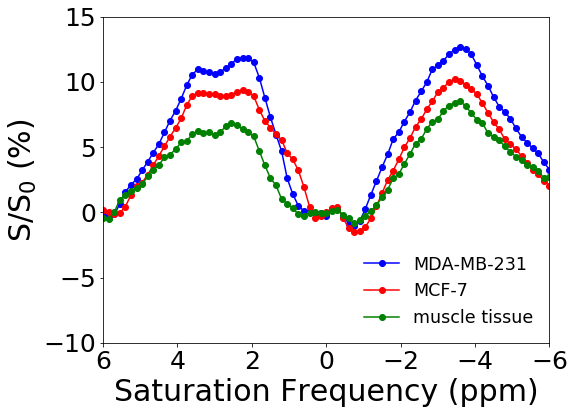

In [24]:
figure(figsize=(8,6))

tag = 2
plot(cestFreq, lorDiff[tag,0]*100, 'bo-', label='MDA-MB-231')
plot(cestFreq, lorDiff[tag,1]*100, 'ro-', label='MCF-7')
plot(cestFreq, lorDiff[tag,2]*100, 'go-', label='muscle tissue')

ylim(-10, 15)
xlim(6,-6)
tick_params(labelsize=25)
legend(loc='lower right',frameon=False, fontsize=17.5)
xlabel('Saturation Frequency (ppm)',fontsize=30)
# xlabel(u'\u0394'+u'\u03C9',fontsize=15)
ylabel('S/S$_0$ (%)',fontsize=30)
xticks([6, 4, 2, 0, -2, -4, -6])

([<matplotlib.axis.XTick at 0x7ff0a8aa88d0>,
 <a list of 7 Text xticklabel objects>)

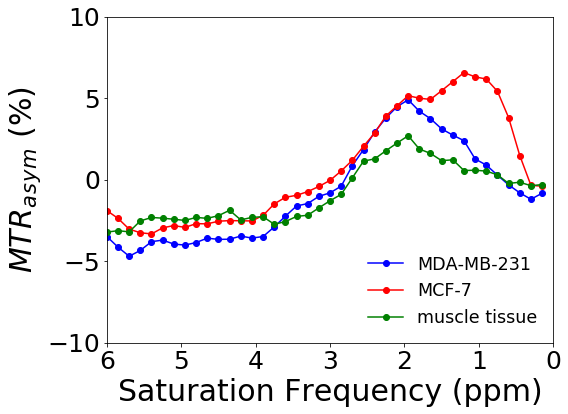

In [25]:
figure(figsize=(8,6))

plot(asymFreq, MTRasym[tag,0]*100, 'bo-', label='MDA-MB-231')
plot(asymFreq, MTRasym[tag,1]*100, 'ro-', label='MCF-7')
plot(asymFreq, MTRasym[tag,2]*100, 'go-', label='muscle tissue')

ylim(-10, 10)
xlim(6,0)
tick_params(labelsize=25)
legend(loc='lower right',frameon=False, fontsize=17.5)
xlabel('Saturation Frequency (ppm)',fontsize=30)
# xlabel(u'\u0394'+u'\u03C9',fontsize=15)
ylabel('${MTR_a}{_s}{_y}{_m}$ (%)',fontsize=30)
xticks([6, 5, 4, 3, 2, 1, 0])

In [26]:
mask1 = np.ma.mask_or(MDA_mask_whole, muscle_mask_mask)
mask2 = np.ma.mask_or(MCF_mask_whole, mask1)
mask = np.ma.mask_or(mask1, mask2)

In [27]:
reload(cxlib)
highFreq = 6.1
lowFreq = -6.1
Data = cestDataCorrected[2]
LDcest, indsFreq = cxlib.LDMap(cestFreq, Data, lowFreq, highFreq)
asym, asymFreq = cxlib.asymMap(cestFreq, Data, lowFreq, highFreq)

In [28]:
def CEST_Avg(cestData, indsFreq, beginFreq, endFreq):
    Inds = where((indsFreq>=beginFreq) & (indsFreq<=endFreq))
    cest_Avg = zeros((cestData.shape[1],cestData.shape[2]))
   
    for ii in Inds[0]:
        cest_Avg = add(cest_Avg, cestData[ii])
    cest_Avg  = cest_Avg / len(Inds[0])
    return cest_Avg

[Text(1,0,'0%'), Text(1,0,'5%'), Text(1,0,'10%'), Text(1,0,'15%')]

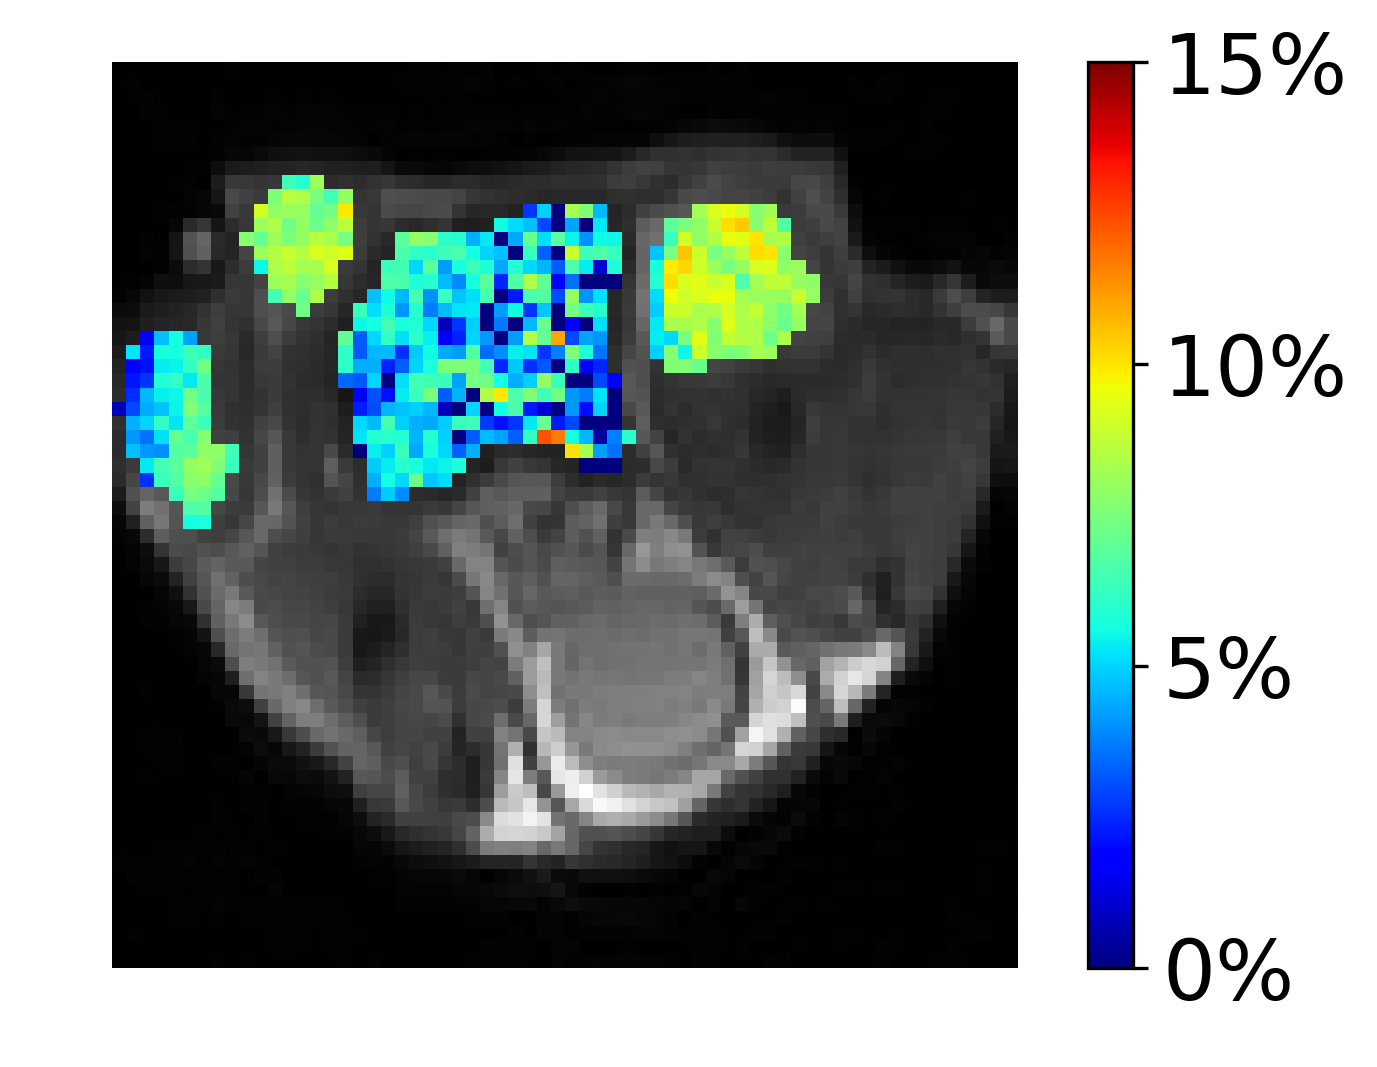

In [29]:
# show LD map at 2, 3.5, 4 ppm
import os,sys
scriptpath = "/Users/cbie1/Documents/pythonLibrary/colormap-master/"
sys.path.append(os.path.abspath(scriptpath))
import colormaps as cmaps


lLim = 0.0
hLim = 0.15

# beginFreq = 1.9
# endFreq = 1.95

beginFreq = 3.5
endFreq = 3.6

# beginFreq = 4.
# endFreq = 4.1


cest_LD_Avg = CEST_Avg(LDcest, indsFreq, beginFreq, endFreq)

# fig, ax = plt.subplots()
fig, ax = plt.subplots(dpi=300)

cax = plt.imshow(cestData[1,-1],origin='lower', cmap='gray')

maskedRoi = ma.masked_array(cest_LD_Avg, mask=(mask==0))
cax = plt.imshow(maskedRoi, origin='lower')
jet()

plt.axis('off')
plt.clim(lLim, hLim)

# cbar = fig.colorbar(cax, ticks=[0., 0.05, 0.10, 0.15])
# cbar.ax.set_yticklabels(['0%', '5%', '10%', '15%'],fontsize=20) 

[Text(1,0,'0%'),
 Text(1,0,'5%'),
 Text(1,0,'10%'),
 Text(1,0,'15%'),
 Text(1,0,'20%')]

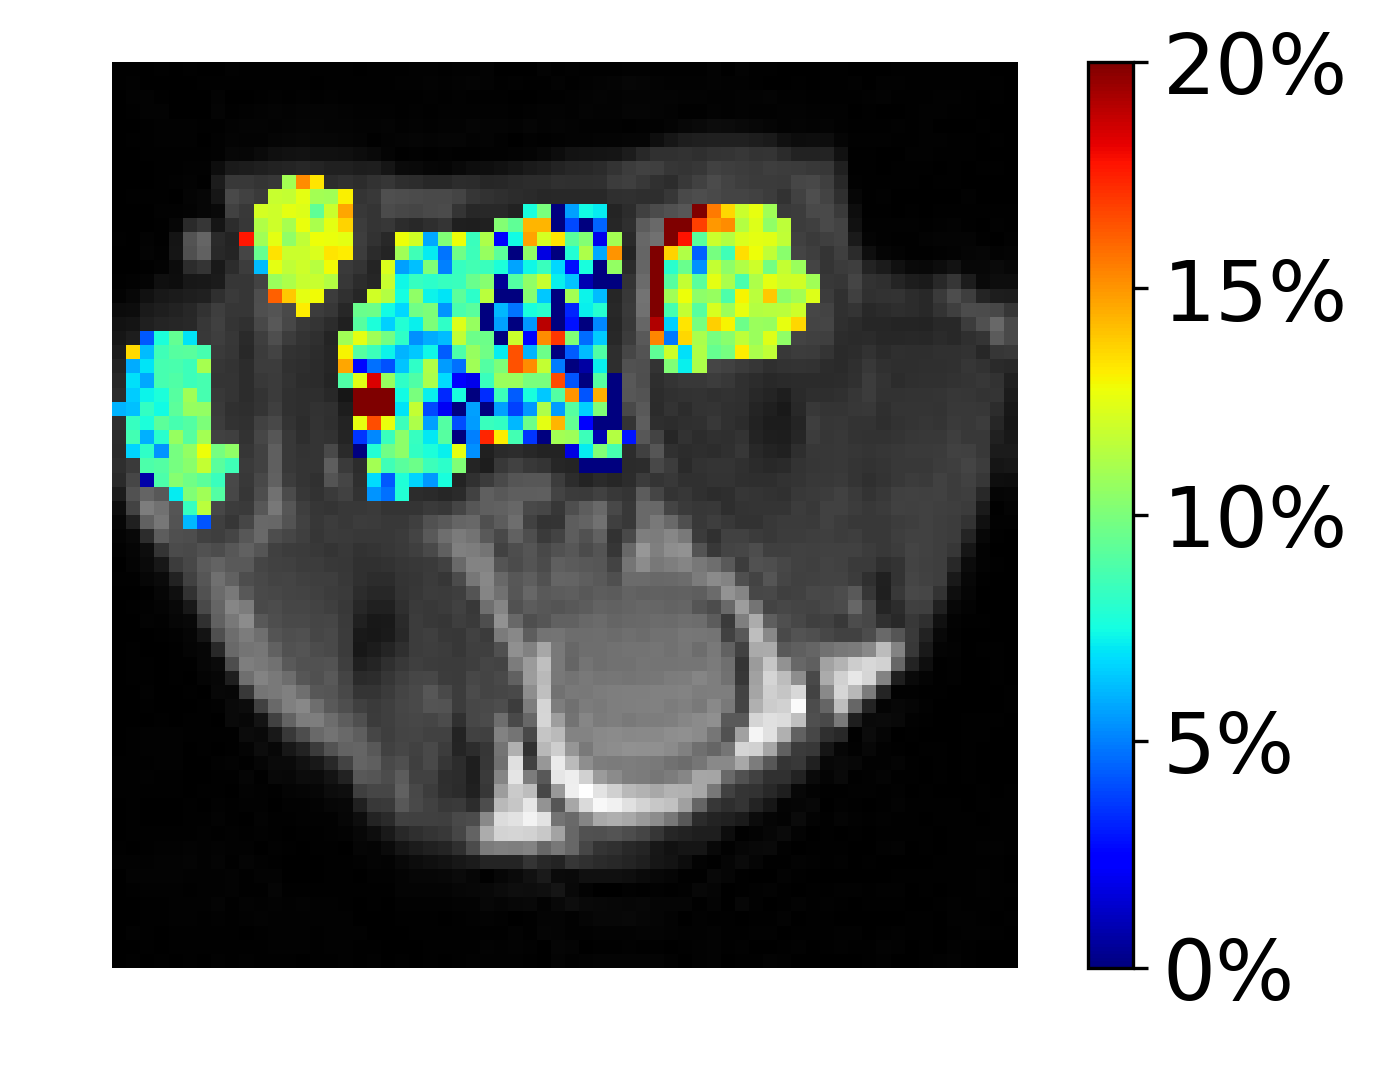

In [30]:
###### show LD map at -3.5ppm
lLim = 0
hLim = 0.2

beginFreq = -3.5
endFreq = -3.4

cest_LD_Avg = CEST_Avg(LDcest, indsFreq, beginFreq, endFreq)

fig, ax = plt.subplots(dpi=300)

cax = imshow(cestData[1,-1])
gray()
maskedRoi = ma.masked_array(cest_LD_Avg, mask=(mask==0))
cax = imshow(maskedRoi, origin='lower')
jet()

plt.axis('off')
plt.clim(lLim, hLim)

cbar = fig.colorbar(cax, ticks=[0., 0.05, 0.1, 0.15, 0.20])
cbar.ax.set_yticklabels(['0%', '5%', '10%', '15%','20%'],fontsize=20) 

[Text(1,0,'-10%'),
 Text(1,0,'-5%'),
 Text(1,0,'0%'),
 Text(1,0,'5%'),
 Text(1,0,'10%')]

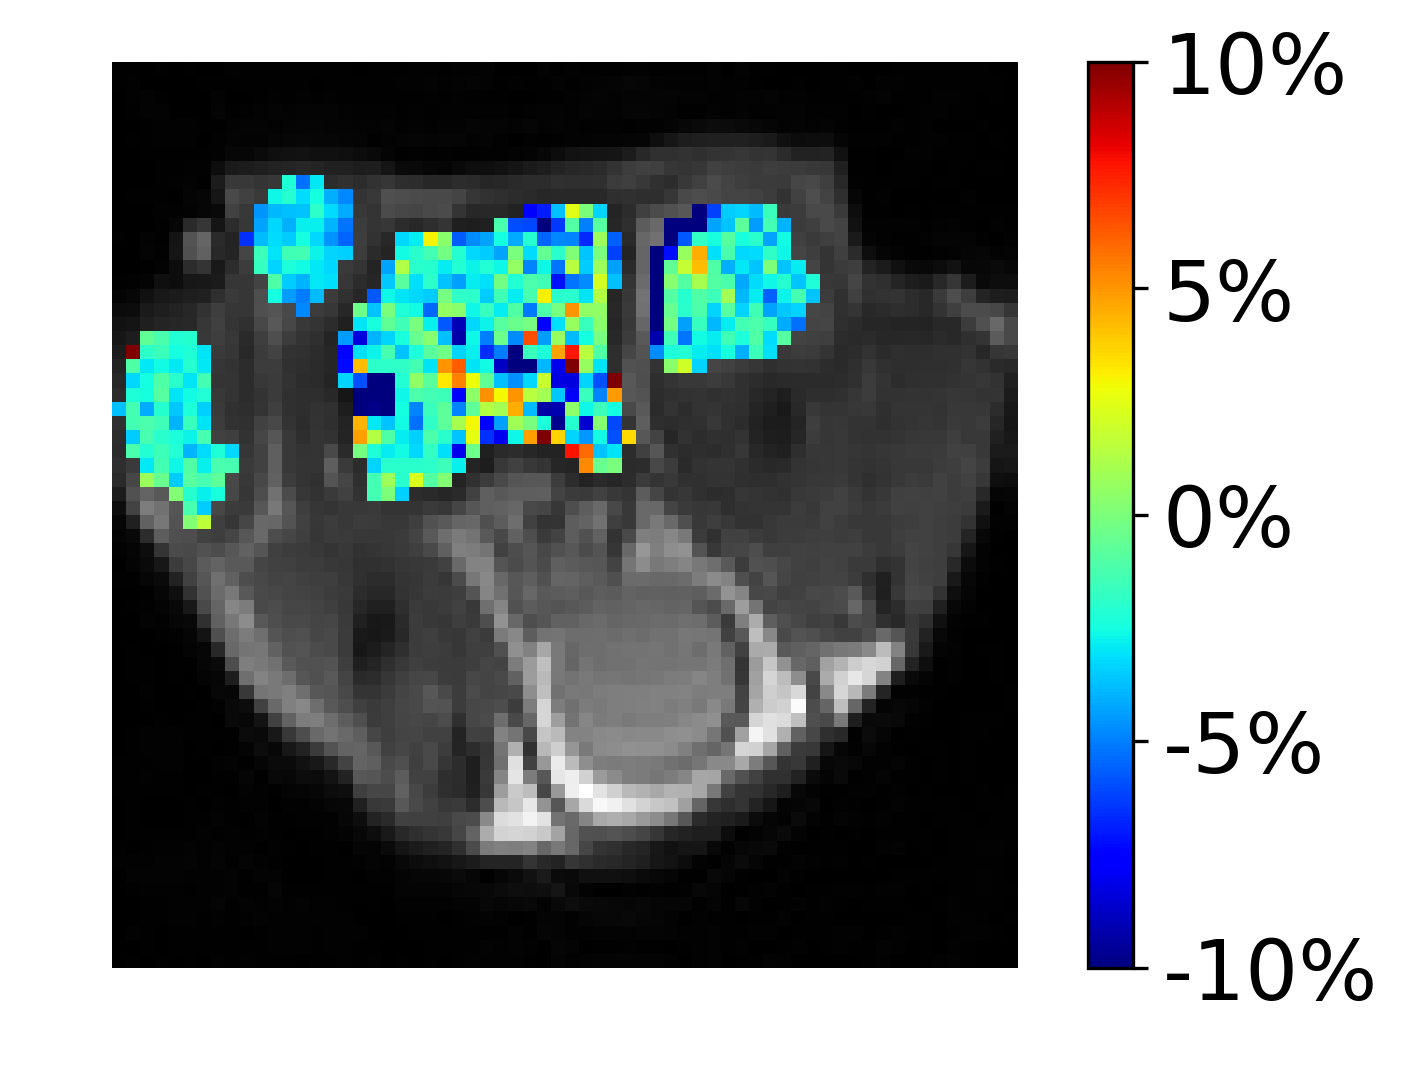

In [31]:
# show MTRasym map at 2, 3.5, 4 ppm
lLim = -0.1
hLim = 0.1


# beginFreq = 1.9
# endFreq = 1.95


beginFreq = 3.5
endFreq = 3.6

# beginFreq = 4.
# endFreq = 4.1



cest_asym_Avg = CEST_Avg(asym, asymFreq, beginFreq, endFreq)

fig, ax = plt.subplots(dpi=300)

cax = imshow(cestData[1,-1])
gray()
maskedRoi = ma.masked_array(cest_asym_Avg, mask=(mask==0))
cax = imshow(maskedRoi, origin='lower')
jet()

plt.axis('off')
plt.clim(lLim, hLim)


# cbar = fig.colorbar(cax, ticks=[-0.1, -0.05,  0, 0.05, 0.1])
# cbar.ax.set_yticklabels(['-10%', '-5%', '0%', '5%', '10%'], fontsize=20) 



# PCA-based denoising and save

In [46]:
# tumor
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

Data_Right_Tumor = []
for ii in range(MDA_mask_whole.shape[0]):
    for ij in range(MDA_mask_whole.shape[1]):
        if MDA_mask_whole[ii, ij] == True:
            Data_Right_Tumor.append(cestDataCorrectedFilter[0, :, ii, ij])
Data_Right_Tumor = array(Data_Right_Tumor)
Index_Right_Tumor = zeros((Data_Right_Tumor.shape[0]))

In [47]:
# tumor
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

Data_Left_Tumor = []
for ii in range(MCF_mask_whole.shape[0]):
    for ij in range(MCF_mask_whole.shape[1]):
        if MCF_mask_whole[ii, ij] == True:
            Data_Left_Tumor.append(cestDataCorrectedFilter[0, :, ii, ij])
Data_Left_Tumor = array(Data_Left_Tumor)
Index_Left_Tumor = zeros((Data_Left_Tumor.shape[0]))+1

In [48]:
# tumor
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

Data_Tissue = []
for ii in range(muscle_mask_mask.shape[0]):
    for ij in range(muscle_mask_mask.shape[1]):
        if muscle_mask_mask[ii, ij] == True:
            Data_Tissue.append(cestDataCorrectedFilter[0, :, ii, ij])
Data_Tissue = array(Data_Tissue)
Index_Tissue = zeros((Data_Tissue.shape[0]))+2

In [49]:
Data_cest = []
Data_cest += list(Data_Right_Tumor)
Data_cest += list(Data_Left_Tumor)
Data_cest += list(Data_Tissue)
Data_cest = array(Data_cest)

Index =[]
Index += list(Index_Right_Tumor)
Index += list(Index_Left_Tumor)
Index += list(Index_Tissue)
Index = array(Index)

In [50]:
# numpy.savetxt(save_dir + mouse + 'whole_sep_0pt5_filter.csv', Data_cest, delimiter = ',')

# data = Data_cest
# data_PCA, eigen_value, var = cxlib.PCA_denoising(data,3,98)
# numpy.savetxt(save_dir + mouse + 'whole_sep_0pt5_denoising_filter.csv', data_PCA, delimiter = ',')

# numpy.savetxt(save_dir + mouse + 'whole_sep_0pt5_denoising_filter_index.csv', Index, delimiter = ',')

14


In [67]:
# save_dir = '/Users/cbie1/OneDrive - Johns Hopkins/JHU/CEST/Machine_Learning_BreastTumor/double_tumor/material_paper/20200824/M1_3/'

Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_2uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_2+1uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_2+1+05uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_2+05uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_1+05uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_1uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_05uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_uneven_2uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_uniform_2uT_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_2uT_LD_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_2uT_MTR_1.csv', delimiter = ',')

# Pred_cnn = np.loadtxt(save_dir + mouse + '_pred_sep_knn_2uT_LD_MTR_1.csv', delimiter = ',')


right_Tumor_Pred_cnn = Pred_cnn[0:len(Data_Right_Tumor)]
left_Tumor_Pred_cnn = Pred_cnn[len(Data_Right_Tumor): len(Data_Right_Tumor)+len(Data_Left_Tumor)]
tissue_Pred_cnn = Pred_cnn[len(Data_Right_Tumor)+len(Data_Left_Tumor):]

map_Pred_Right_Tumor_cnn = zeros((MDA_mask_whole.shape[0], MDA_mask_whole.shape[1]))
map_Pred_Right_False_Left_Tumor_cnn = zeros((MDA_mask_whole.shape[0], MDA_mask_whole.shape[1]))
map_Pred_Right_False_Tissue_Tumor_cnn = zeros((MDA_mask_whole.shape[0], MDA_mask_whole.shape[1]))

map_Pred_Left_Tumor_cnn = zeros((MCF_mask_whole.shape[0], MCF_mask_whole.shape[1]))
map_Pred_Left_False_Right_Tumor_cnn = zeros((MCF_mask_whole.shape[0], MCF_mask_whole.shape[1]))
map_Pred_Left_False_Tissue_Tumor_cnn = zeros((MCF_mask_whole.shape[0], MCF_mask_whole.shape[1]))

map_Pred_Tissue_cnn = zeros((muscle_mask_mask.shape[0], muscle_mask_mask.shape[1]))
map_Pred_Tissue_False_Right_Tumor_cnn = zeros((muscle_mask_mask.shape[0], muscle_mask_mask.shape[1]))
map_Pred_Tissue_False_Left_Tumor_cnn = zeros((muscle_mask_mask.shape[0], muscle_mask_mask.shape[1]))


count = 0
for ii in range(MDA_mask_whole.shape[0]):
    for ij in range(MDA_mask_whole.shape[1]):
        if MDA_mask_whole[ii, ij] == 1:
            if right_Tumor_Pred_cnn[count] == 0:
                map_Pred_Right_Tumor_cnn[ii, ij] = 1
            elif right_Tumor_Pred_cnn[count] == 1:
                map_Pred_Right_False_Left_Tumor_cnn[ii, ij] = 1
            elif right_Tumor_Pred_cnn[count] == 2:
                map_Pred_Right_False_Tissue_Tumor_cnn[ii, ij] = 1
            count = count + 1
        
count = 0
for ii in range(MCF_mask_whole.shape[0]):
    for ij in range(MCF_mask_whole.shape[1]):
        if MCF_mask_whole[ii, ij] == 1:
            if left_Tumor_Pred_cnn[count] == 1:
                map_Pred_Left_Tumor_cnn[ii, ij] = 1
            elif left_Tumor_Pred_cnn[count] == 0:
                map_Pred_Left_False_Right_Tumor_cnn[ii, ij] = 1
            elif left_Tumor_Pred_cnn[count] == 2:
                map_Pred_Left_False_Tissue_Tumor_cnn[ii, ij] = 1
            count = count + 1
            
            
count = 0
for ii in range(muscle_mask_mask.shape[0]):
    for ij in range(muscle_mask_mask.shape[1]):
        if muscle_mask_mask[ii, ij] == 1:
            if tissue_Pred_cnn[count] == 2:
                map_Pred_Tissue_cnn[ii, ij] = 1
            elif tissue_Pred_cnn[count] == 0:
                map_Pred_Tissue_False_Right_Tumor_cnn[ii, ij] = 1
            elif tissue_Pred_cnn[count] == 1:
                map_Pred_Tissue_False_Left_Tumor_cnn[ii, ij] = 1
            count = count + 1

(-0.5, 63.5, -0.5, 63.5)

<Figure size 864x432 with 0 Axes>

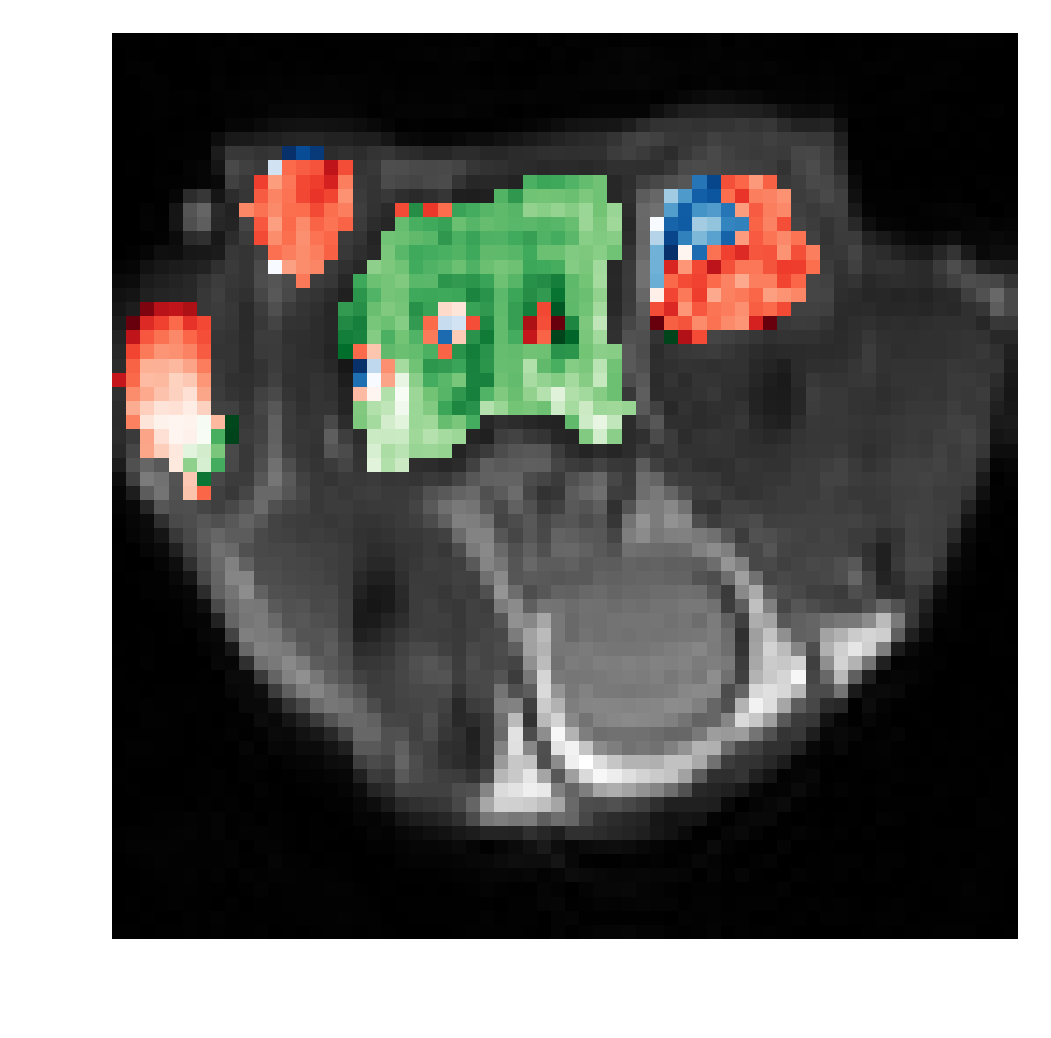

In [68]:
from matplotlib import colors
figure(figsize=(12,6))
figure(dpi=300)
imshow(cestData[0,-1], origin = 'lower')
gray()
# plt.clim(0, 1)
# plt.colorbar()
# cmap = colors.ListedColormap(['blue'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Right_Tumor_cnn==0))
imshow(maskedRoi, cmap='Blues_r', origin = 'lower')

cmap = colors.ListedColormap(['red'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Right_False_Left_Tumor_cnn==0))
imshow(maskedRoi,cmap='Reds_r', origin = 'lower')

cmap = colors.ListedColormap(['green'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Right_False_Tissue_Tumor_cnn==0))
imshow(maskedRoi,cmap='Greens_r', origin = 'lower')

#---------------------------------------------------
cmap = colors.ListedColormap(['red'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Left_Tumor_cnn==0))
imshow(maskedRoi,cmap='Reds_r', origin = 'lower')

cmap = colors.ListedColormap(['blue'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Left_False_Right_Tumor_cnn==0))
imshow(maskedRoi, cmap='Blues_r', origin = 'lower')

cmap = colors.ListedColormap(['green'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Left_False_Tissue_Tumor_cnn==0))
imshow(maskedRoi,cmap='Greens_r', origin = 'lower')

#---------------------------------------------------
cmap = colors.ListedColormap(['green'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Tissue_cnn==0))
imshow(maskedRoi,cmap='Greens_r', origin = 'lower')

cmap = colors.ListedColormap(['blue'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Tissue_False_Right_Tumor_cnn==0))
imshow(maskedRoi, cmap='Blues_r', origin = 'lower')

cmap = colors.ListedColormap(['red'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Tissue_False_Left_Tumor_cnn==0))
imshow(maskedRoi,cmap='Reds_r', origin = 'lower')

axis('off')

In [78]:
test_roi0 = [(46.099999999999994, 49.833333333333336), (45.83333333333333, 49.03333333333333), (45.23333333333333, 48.36666666666667), (44.099999999999994, 47.766666666666666), (42.56666666666666, 46.9), (40.96666666666666, 45.96666666666667), (40.36666666666666, 44.766666666666666), (41.3, 43.56666666666666), (43.49999999999999, 43.833333333333336), (45.76666666666666, 44.5), (47.36666666666666, 45.63333333333333), (48.033333333333324, 47.43333333333333), (48.033333333333324, 48.9), (47.166666666666664, 50.166666666666664), (46.49999999999999, 50.166666666666664)]
# [(13.966666666666663, 52.9), (12.766666666666664, 52.63333333333333), (11.83333333333333, 51.833333333333336), (10.566666666666665, 51.03333333333333), (10.499999999999998, 49.3), (11.899999999999997, 49.43333333333333), (13.233333333333329, 50.233333333333334), (14.099999999999996, 51.1), (14.366666666666662, 52.36666666666667)]
test_roi1 = [(46.43333333333333, 45.833333333333336), (45.36666666666666, 45.766666666666666), (44.36666666666666, 45.56666666666666), (42.96666666666666, 45.3), (41.633333333333326, 44.766666666666666), (42.49999999999999, 43.96666666666667), (43.633333333333326, 43.9), (45.099999999999994, 44.3), (46.89999999999999, 44.96666666666667), (47.43333333333333, 45.5), (46.96666666666666, 45.7)]
# [(46.76666666666666, 46.03333333333333), (44.56666666666666, 46.233333333333334), (42.83333333333333, 45.7), (41.49999999999999, 45.36666666666667), (39.96666666666666, 44.43333333333333), (41.3, 43.166666666666664), (43.76666666666666, 43.166666666666664), (45.633333333333326, 43.43333333333333), (46.633333333333326, 43.833333333333336), (47.3, 45.166666666666664)]
# [(46.56666666666666, 49.9), (45.96666666666666, 49.03333333333333), (45.23333333333333, 47.96666666666667), (44.166666666666664, 46.36666666666667), (43.699999999999996, 45.1), (43.96666666666666, 44.43333333333333), (45.033333333333324, 44.63333333333333), (46.43333333333333, 45.43333333333333), (47.033333333333324, 46.5), (47.633333333333326, 47.833333333333336), (47.633333333333326, 48.7), (47.3, 49.833333333333336)]

# test_roi0 = [(x[0]+0, x[1]+1) for x in test_roi0]
test_roi1 = [(x[0]+0, x[1]-.5) for x in test_roi1]
# test_roi1 = [(x[0]-0, x[1]-1.5) for x in test_roi1]


test0_mask = nylib2.roipolyny(cestDataCorrected[0], test_roi0)
test1_mask = nylib2.roipolyny(cestDataCorrected[0], test_roi1)

kernel = np.ones((1,1),np.uint8)
# test0_mask = cv2.erode(test0_mask,kernel,iterations = 1)
# test1_mask = cv2.erode(test1_mask,kernel,iterations = 1)
# test2_mask = cv2.erode(test2_mask,kernel,iterations = 1)

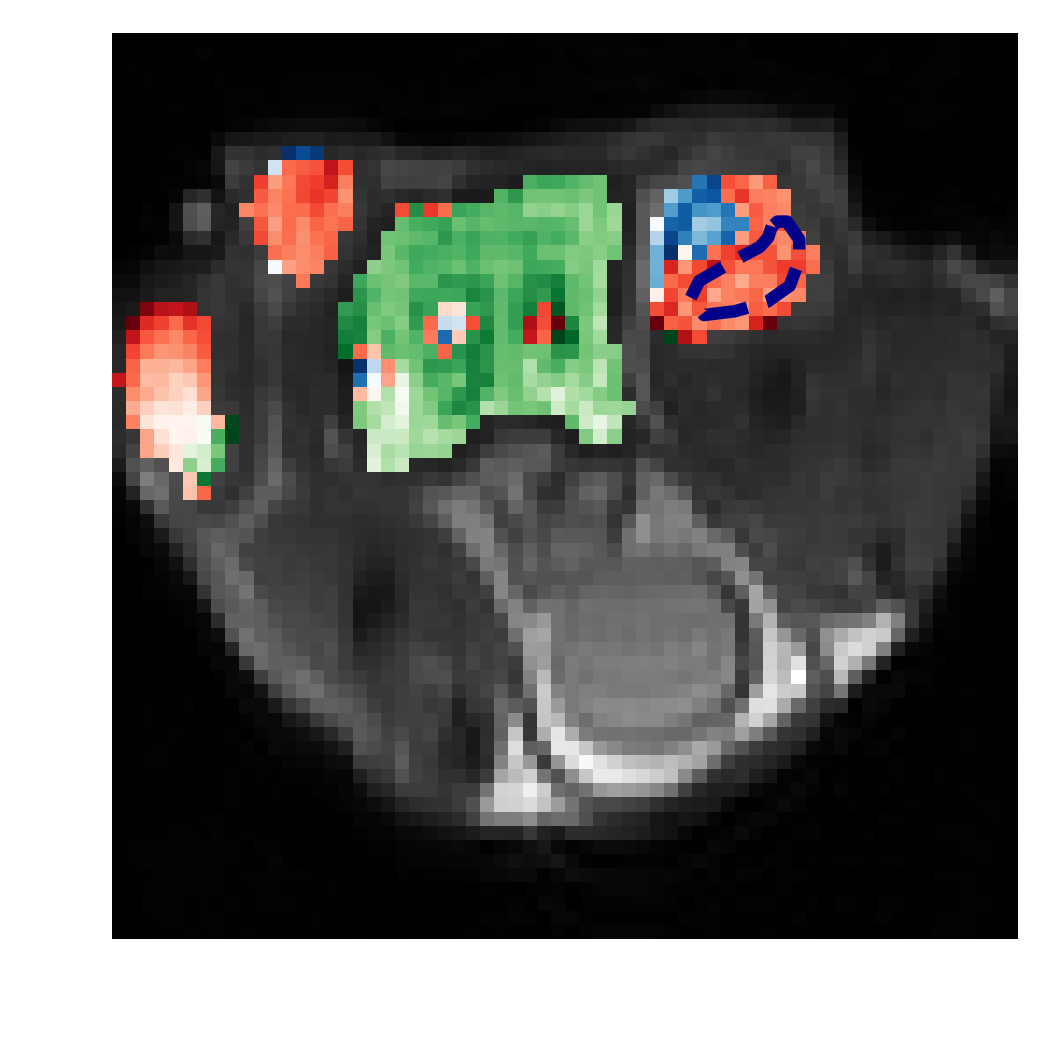

In [79]:
from matplotlib import colors
# figure(figsize=(12,6))
# figure(figsize=(12,6))
figure(dpi=300)
imshow(cestData[-1,-1], origin = 'lower')
gray()
# plt.clim(0, 1)
# plt.colorbar()
# cmap = colors.ListedColormap(['blue'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Right_Tumor_cnn==0))
imshow(maskedRoi, cmap='Blues_r', origin = 'lower')

cmap = colors.ListedColormap(['red'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Right_False_Left_Tumor_cnn==0))
imshow(maskedRoi,cmap='Reds_r', origin = 'lower')

cmap = colors.ListedColormap(['green'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Right_False_Tissue_Tumor_cnn==0))
imshow(maskedRoi,cmap='Greens_r', origin = 'lower')

#---------------------------------------------------
cmap = colors.ListedColormap(['red'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Left_Tumor_cnn==0))
imshow(maskedRoi,cmap='Reds_r', origin = 'lower')

cmap = colors.ListedColormap(['blue'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Left_False_Right_Tumor_cnn==0))
imshow(maskedRoi, cmap='Blues_r', origin = 'lower')

cmap = colors.ListedColormap(['green'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Left_False_Tissue_Tumor_cnn==0))
imshow(maskedRoi,cmap='Greens_r', origin = 'lower')

#---------------------------------------------------
cmap = colors.ListedColormap(['green'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Tissue_cnn==0))
imshow(maskedRoi,cmap='Greens_r', origin = 'lower')

cmap = colors.ListedColormap(['blue'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Tissue_False_Right_Tumor_cnn==0))
imshow(maskedRoi, cmap='Blues_r', origin = 'lower')

cmap = colors.ListedColormap(['red'])
maskedRoi = ma.masked_array(cestData[-1,-1], mask=(map_Pred_Tissue_False_Left_Tumor_cnn==0))
imshow(maskedRoi,cmap='Reds_r', origin = 'lower')

axis('off')


XY = test_roi0
XY=np.array(XY)
XY = np.concatenate ((XY, [XY[0,:]]), axis=0 )
plot(XY.transpose()[0], XY.transpose()[1], '--', color='darkblue', linewidth = 3)
figure(1).canvas.draw()

# XY = test_roi1
# XY=np.array(XY)
# XY = np.concatenate ((XY, [XY[0,:]]), axis=0 )
# plot(XY.transpose()[0], XY.transpose()[1], '--',color='blue', linewidth = 3)
# figure(1).canvas.draw()


In [80]:
# Z-spectra
pulsePowers = r_[0.5, 1.0, 2.0]

data_pulsePowerDependence_masked_test = zeros((cestDataCorrected.shape[0], 2, cestDataCorrected.shape[1]))

for ii in range(len(pulsePowers)):    
    data_pulsePowerDependence_masked_test[ii, 0] = nylib2.applyMask(cestDataCorrected[ii], test0_mask)
    data_pulsePowerDependence_masked_test[ii, 1] = nylib2.applyMask(cestDataCorrected[ii], test1_mask)

In [81]:
import scipy.io

path3 = '/Volumes/CX/JHU/Machine_Learning_BreastTumor/results/20210104/old_mice/M3-2/'
invivo_MDA231_3_o = scipy.io.loadmat(path3 +  'M3_2_Ztab_MDA_MB_231_ref.mat')
invivo_MDA231_3_o = invivo_MDA231_3_o['Ztab_MDA_MB_231']
invivo_MCF7_3_o = scipy.io.loadmat(path3 +  'M3_2_Ztab_MCF_7_ref.mat')
invivo_MCF7_3_o = invivo_MCF7_3_o['Ztab_MCF_7']
invivo_muscle_3_o = scipy.io.loadmat(path3 +  'M3_2_Ztab_muscle_back_ref.mat')
invivo_muscle_3_o = invivo_muscle_3_o['Ztab_Muscle']


([<matplotlib.axis.XTick at 0x7ff098d0a9d0>,
 <a list of 7 Text xticklabel objects>)

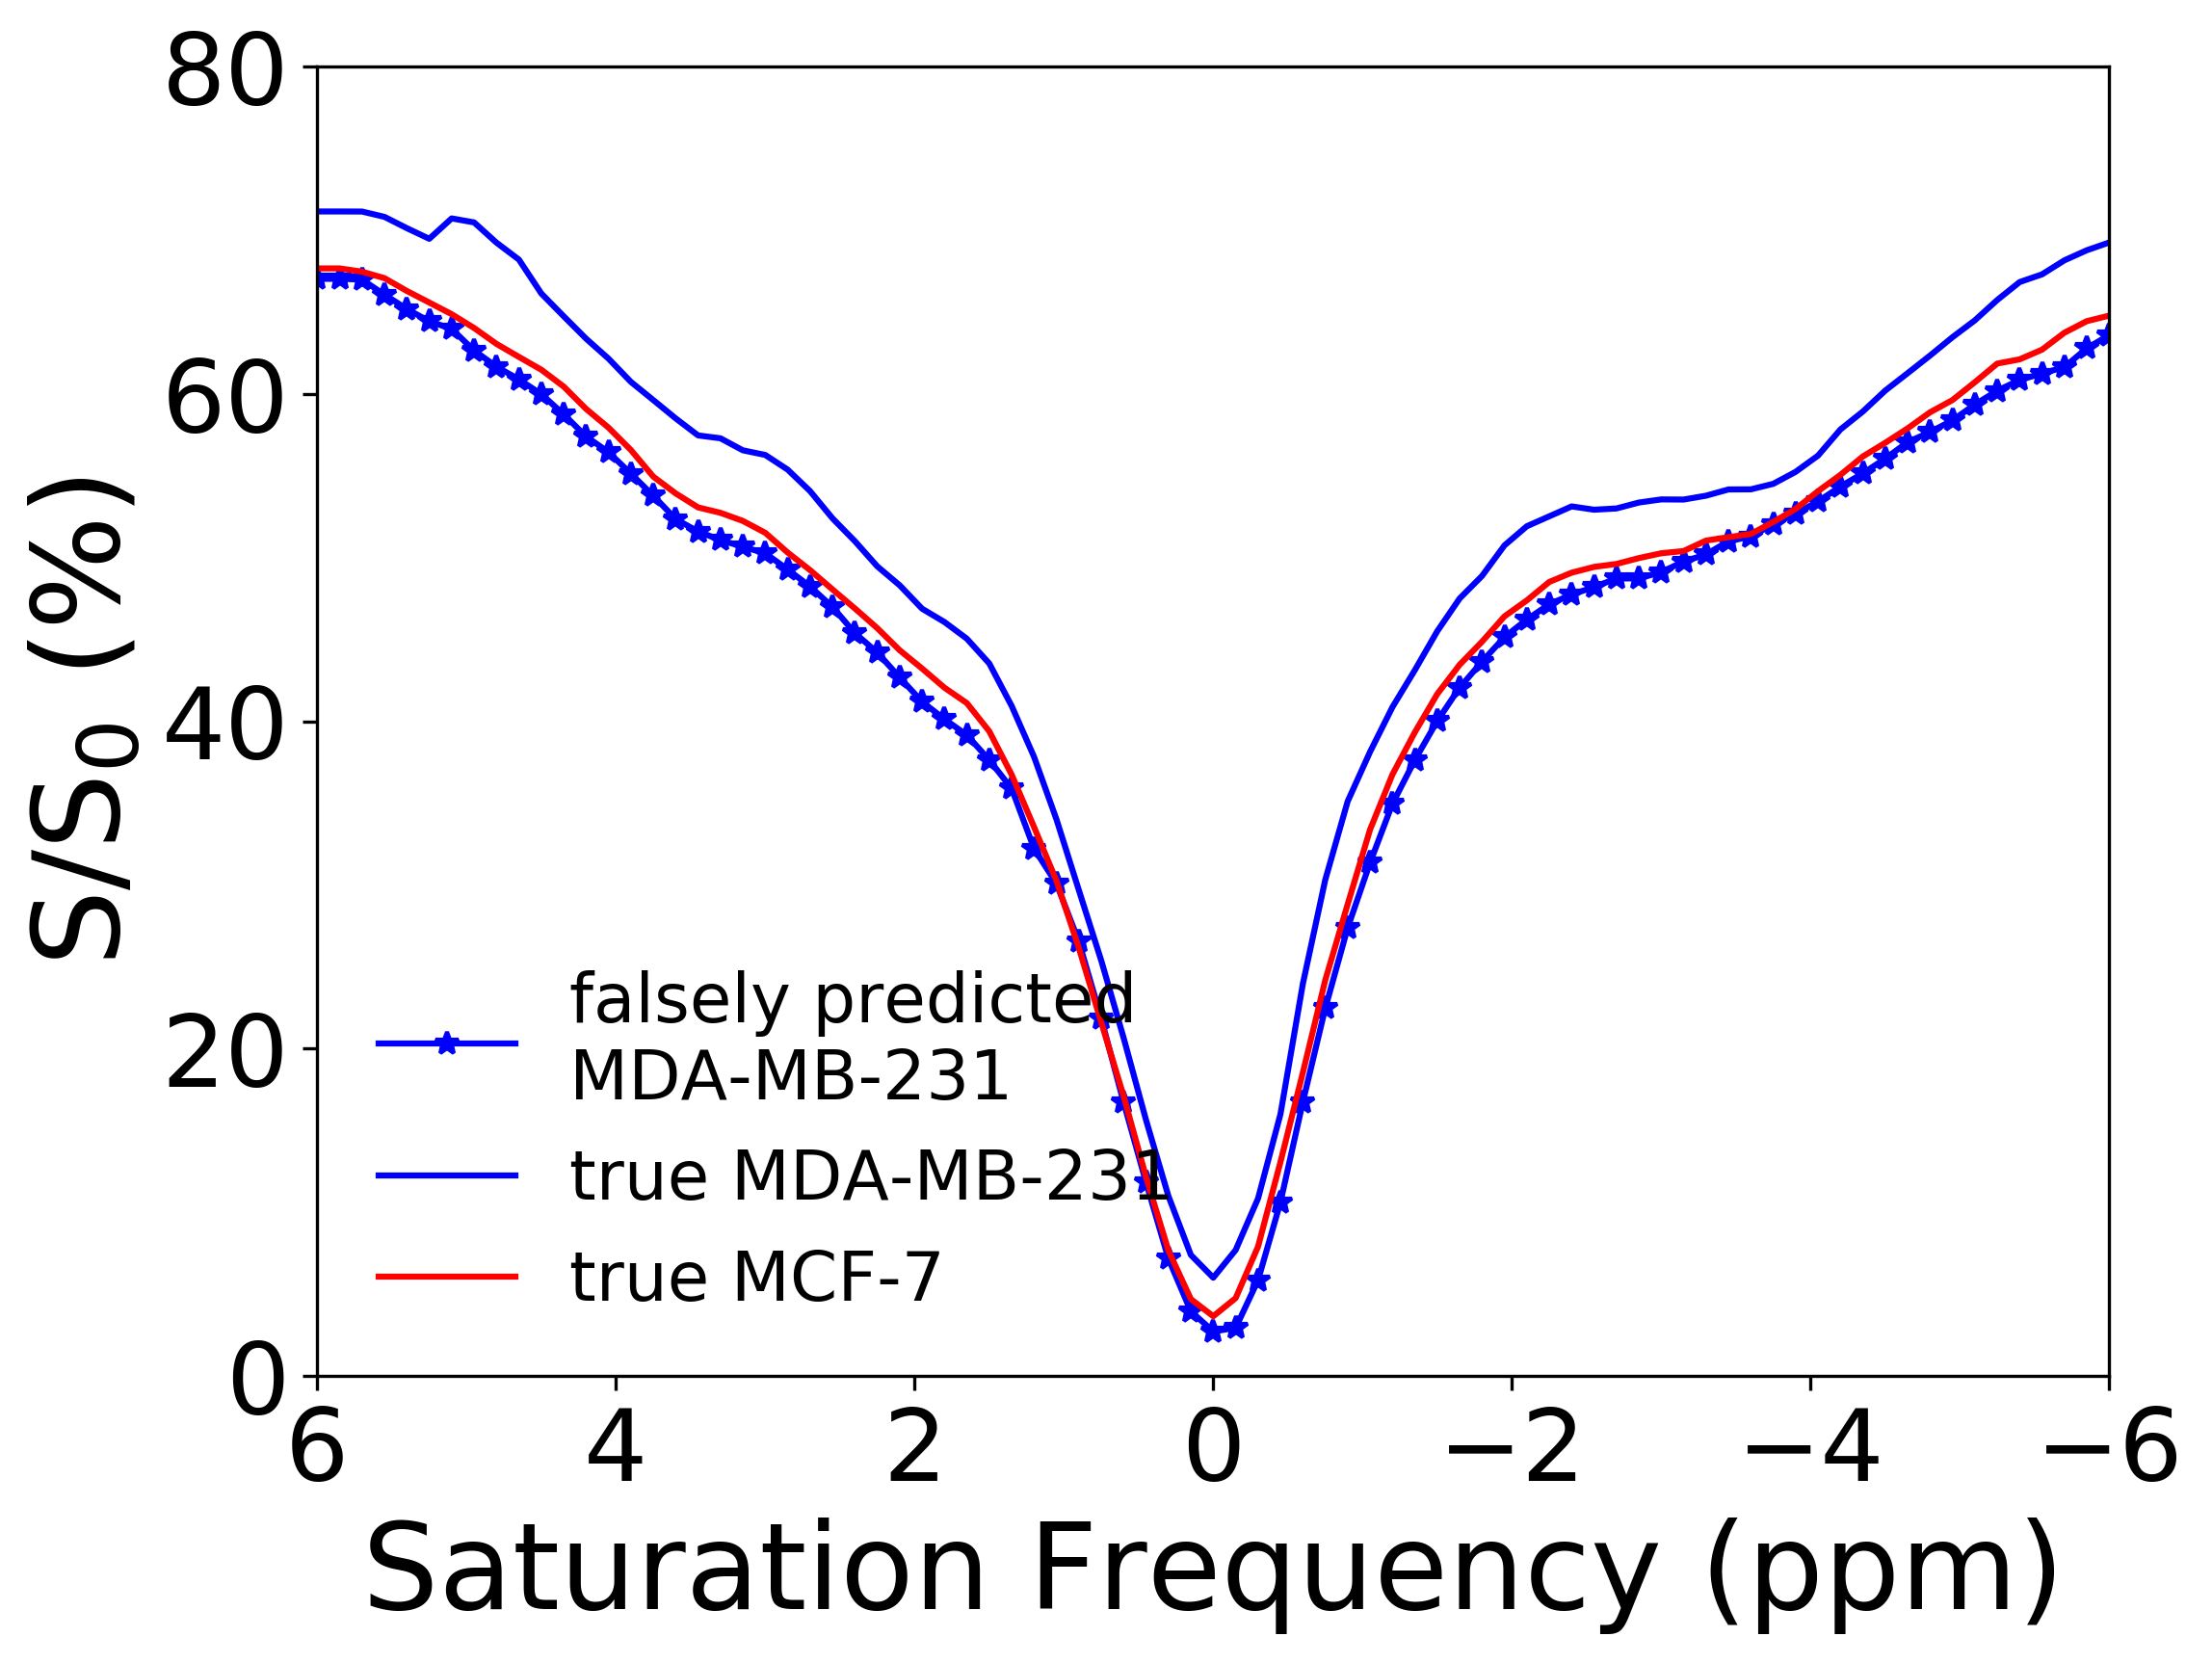

In [83]:
figure(figsize=(8,6), dpi=300)

plot(cestFreq, data_pulsePowerDependence_masked_test[2,0]*100, 'b*-', label='falsely predicted\nMDA-MB-231')
plot(cestFreq, invivo_MDA231_3_o[2]*100, 'b-', label='true MDA-MB-231')

# plot(cestFreq, data_pulsePowerDependence_masked_test[2,1]*100, 'b*-', label='false predicted\nMDA-MB-231')
plot(cestFreq, invivo_MCF7_3_o[2]*100, 'r-', label='true MCF-7')

ylim(0, 80)
xlim(6,-6)
tick_params(labelsize=25)
legend(loc='lower left',frameon=False, fontsize=17)
xlabel('Saturation Frequency (ppm)',fontsize=30)
# xlabel(u'\u0394'+u'\u03C9',fontsize=15)
ylabel('S/S$_0$ (%)',fontsize=30)
xticks([6, 4, 2, 0, -2, -4, -6])